[25S]Introduction to Data Sciences 

In [1]:
# Required Libraries
# Install packages if not already installed
required_packages <- c("psych", "car", "lmtest", "corrplot", "REdaS", 
                      "pROC", "ROCR", "caret", "ggplot2", "dplyr")

for(pkg in required_packages) {
  if(!require(pkg, character.only = TRUE)) {
    install.packages(pkg)
    library(pkg, character.only = TRUE)
  }
}

Loading required package: psych

Loading required package: car

Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:psych':

    logit


Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: corrplot

corrplot 0.95 loaded

Loading required package: REdaS

Loading required package: grid

Loading required package: pROC

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Loading required package: ROCR

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'caret'"
also installing the dependencies 'listenv', 'parallelly', 'future', 'globals', 'future.apply', 'progressr', 'SQUAREM', 


The downloaded binary packages are in
	/var/folders/bb/k1shr4v91v31nkqyrqrn1p680000gn/T//RtmpeFbJW2/downloaded_packages


Loading required package: ggplot2


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Loading required package: lattice

Loading required package: dplyr


Attaching package: 'dplyr'


The following object is masked from 'package:car':

    recode


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




# =============================================================================
# DATA IMPORT AND INITIAL SETUP
# =============================================================================


In [3]:
wine_data <- read.csv("wine.csv", stringsAsFactors = FALSE)

# Remove the index column (X) as specified in assignment
wine_data <- wine_data[, -1]

# Display basic information about the dataset
cat("=== WINE DATASET OVERVIEW ===\n")
cat("Dataset dimensions:", dim(wine_data), "\n")
cat("Number of observations:", nrow(wine_data), "\n")
cat("Number of variables:", ncol(wine_data), "\n\n")

# Display structure
str(wine_data)

# Convert variety to factor
wine_data$variety <- as.factor(wine_data$variety)

=== WINE DATASET OVERVIEW ===
Dataset dimensions: 6497 13 
Number of observations: 6497 
Number of variables: 13 

'data.frame':	6497 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 7.5 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.5 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.36 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 6.1 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.071 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 17 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 102 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.35 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.8 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 10.5 ...
 $ quality            

# =============================================================================
# TASK 1: EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================



=== TASK 1: EXPLORATORY DATA ANALYSIS ===

--- Summary Statistics for All Metric Variables ---
                     vars    n   mean    sd median trimmed   mad  min    max
fixed.acidity           1 6497   7.22  1.30   7.00    7.06  0.89 3.80  15.90
volatile.acidity        2 6497   0.34  0.16   0.29    0.32  0.12 0.08   1.58
citric.acid             3 6497   0.32  0.15   0.31    0.32  0.10 0.00   1.66
residual.sugar          4 6497   5.44  4.76   3.00    4.70  2.52 0.60  65.80
chlorides               5 6497   0.06  0.04   0.05    0.05  0.02 0.01   0.61
free.sulfur.dioxide     6 6497  30.53 17.75  29.00   29.32 17.79 1.00 289.00
total.sulfur.dioxide    7 6497 115.74 56.52 118.00  115.92 57.82 6.00 440.00
density                 8 6497   0.99  0.00   0.99    0.99  0.00 0.99   1.04
pH                      9 6497   3.22  0.16   3.21    3.21  0.16 2.72   4.01
sulphates              10 6497   0.53  0.15   0.51    0.52  0.12 0.22   2.00
alcohol                11 6497  10.49  1.19  10.30   10.4

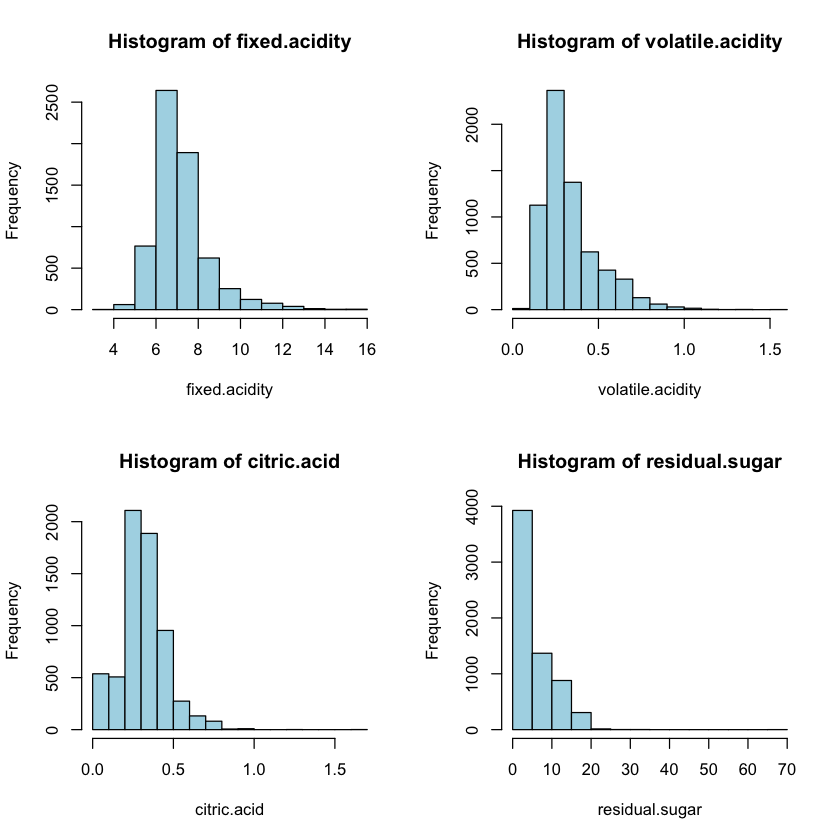

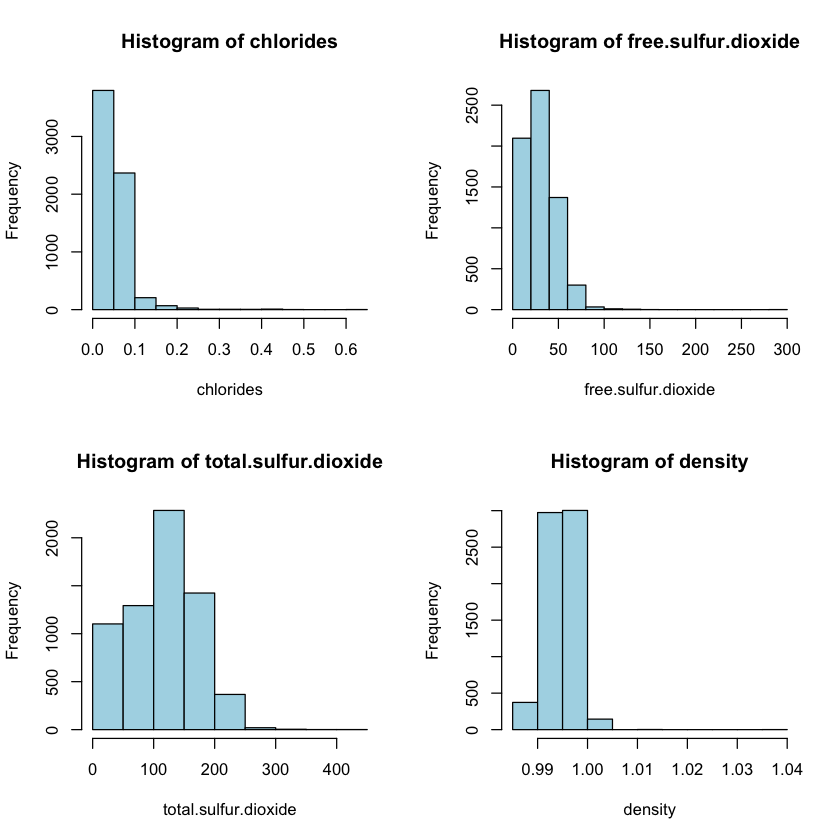


Skewness Analysis Results:
               Variable     Skewness          Interpretation
1         fixed.acidity  1.722493997            Right-skewed
2      volatile.acidity  1.494406250            Right-skewed
3           citric.acid  0.471512872 Approximately symmetric
4        residual.sugar  1.434741531            Right-skewed
5             chlorides  5.397334609            Right-skewed
6   free.sulfur.dioxide  1.219502764            Right-skewed
7  total.sulfur.dioxide -0.001176935 Approximately symmetric
8               density  0.503369215            Right-skewed
9                    pH  0.386660193 Approximately symmetric
10            sulphates  1.796440197            Right-skewed
11              alcohol  0.565456535            Right-skewed
12              quality  0.189535144 Approximately symmetric

--- Outlier Detection using Boxplots ---


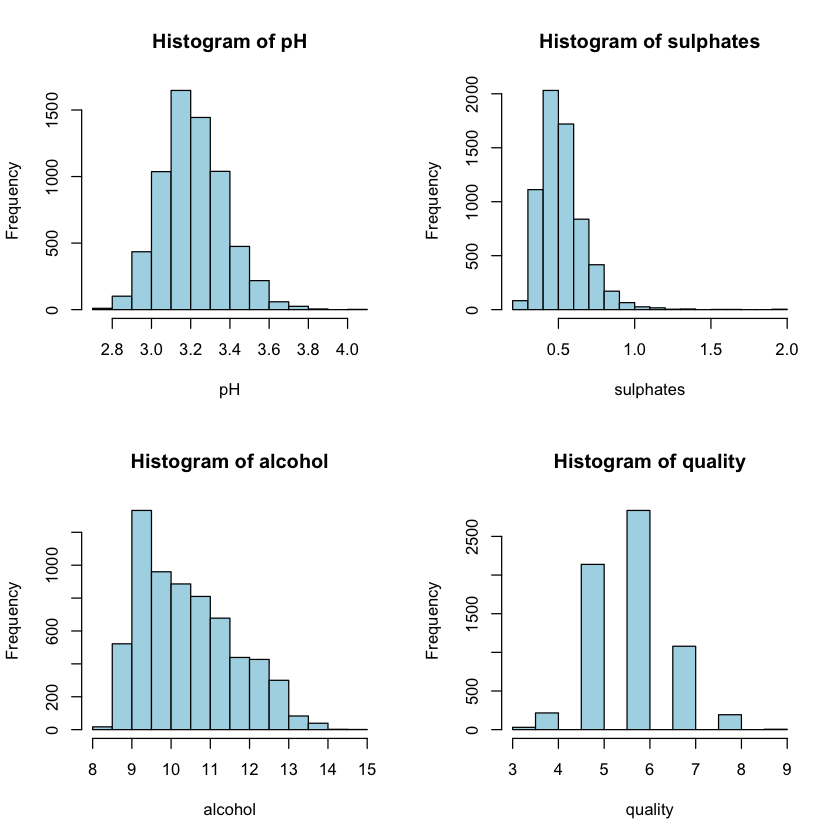


=== TASK 2: HYPOTHESIS TESTING ===
--- Descriptive Statistics by Wine Type ---
Red wine alcohol content:
Mean: 10.42298 
SD: 1.065668 
N: 1599 

White wine alcohol content:
Mean: 10.51427 
SD: 1.230621 
N: 4898 

--- Checking T-Test Assumptions ---
1. Normality Tests:
Red wine alcohol normality (Shapiro-Wilk): p = 6.644057e-27 
White wine alcohol normality (Shapiro-Wilk): p = 2.569014e-36 

2. Equal Variances Test (Levene):
Levene's Test for Homogeneity of Variance (center = median)
        Df F value    Pr(>F)    
group    1  72.785 < 2.2e-16 ***
      6495                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

3. Independence: Assumed based on random sampling design

--- Two-Sample T-Test Results ---

	Welch Two Sample t-test

data:  red_alcohol and white_alcohol
t = -2.859, df = 3100.5, p-value = 0.004278
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.15388669 -0.02868117
sample estimates:
me

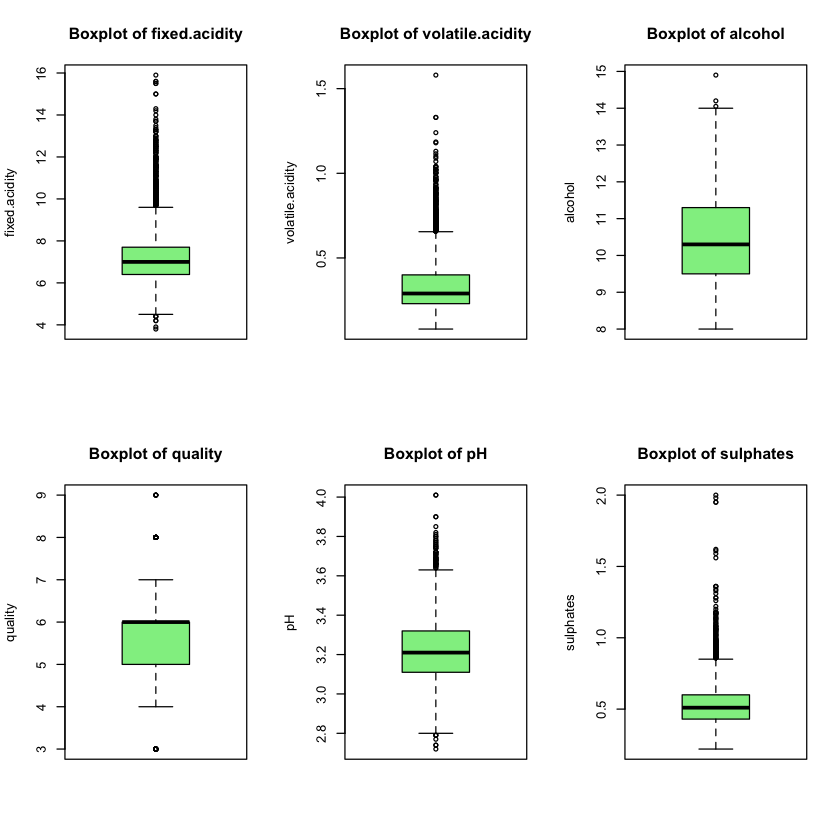

In [4]:
cat("\n=== TASK 1: EXPLORATORY DATA ANALYSIS ===\n")

# a) Summary statistics for all metric variables
cat("\n--- Summary Statistics for All Metric Variables ---\n")

# Select numeric variables (exclude variety)
numeric_vars <- wine_data[, sapply(wine_data, is.numeric)]

# Comprehensive summary statistics
summary_stats <- describe(numeric_vars)
print(summary_stats)

# Check for missing values
cat("\n--- Missing Values Analysis ---\n")
missing_values <- sapply(wine_data, function(x) sum(is.na(x)))
print(missing_values)

if(sum(missing_values) == 0) {
  cat("No missing values found in the dataset.\n")
} else {
  cat("Missing values detected. See above for details.\n")
}

# Frequency distributions for categorical variables
cat("\n--- Frequency Distributions for Categorical Variables ---\n")
cat("Wine Variety Distribution:\n")
variety_table <- table(wine_data$variety)
print(variety_table)
print(prop.table(variety_table))

cat("\nQuality Distribution:\n")
quality_table <- table(wine_data$quality)
print(quality_table)
print(prop.table(quality_table))

# b) Create visualizations and calculate skewness
cat("\n--- Generating Graphics and Skewness Analysis ---\n")

# Set up plotting parameters
par(mfrow = c(2, 2))

# Loop through numeric variables for histograms and skewness
skewness_results <- data.frame(
  Variable = names(numeric_vars),
  Skewness = numeric(ncol(numeric_vars)),
  Interpretation = character(ncol(numeric_vars)),
  stringsAsFactors = FALSE
)

for(i in 1:ncol(numeric_vars)) {
  var_name <- names(numeric_vars)[i]
  var_data <- numeric_vars[, i]
  
  # Calculate skewness
  skew_val <- skew(var_data, na.rm = TRUE)
  skewness_results$Skewness[i] <- skew_val
  
  # Interpret skewness
  if(abs(skew_val) < 0.5) {
    skewness_results$Interpretation[i] <- "Approximately symmetric"
  } else if(skew_val >= 0.5) {
    skewness_results$Interpretation[i] <- "Right-skewed"
  } else {
    skewness_results$Interpretation[i] <- "Left-skewed"
  }
  
  # Create histogram
  hist(var_data, 
       main = paste("Histogram of", var_name),
       xlab = var_name,
       col = "lightblue",
       border = "black")
}

# Reset plotting parameters
par(mfrow = c(1, 1))

cat("\nSkewness Analysis Results:\n")
print(skewness_results)

# Boxplots for outlier detection
cat("\n--- Outlier Detection using Boxplots ---\n")

# Create boxplots for key variables
par(mfrow = c(2, 3))
key_vars <- c("fixed.acidity", "volatile.acidity", "alcohol", "quality", "pH", "sulphates")

for(var in key_vars) {
  if(var %in% names(wine_data)) {
    boxplot(wine_data[[var]], 
            main = paste("Boxplot of", var),
            ylab = var,
            col = "lightgreen")
  }
}

par(mfrow = c(1, 1))

# =============================================================================
# TASK 2: HYPOTHESIS TESTING - ALCOHOL CONTENT BY WINE TYPE
# =============================================================================

cat("\n=== TASK 2: HYPOTHESIS TESTING ===\n")

# Research question: Does alcohol content differ significantly between red and white wines?

# Separate alcohol content by wine variety
red_alcohol <- wine_data$alcohol[wine_data$variety == "red"]
white_alcohol <- wine_data$alcohol[wine_data$variety == "white"]

cat("--- Descriptive Statistics by Wine Type ---\n")
cat("Red wine alcohol content:\n")
cat("Mean:", mean(red_alcohol, na.rm = TRUE), "\n")
cat("SD:", sd(red_alcohol, na.rm = TRUE), "\n")
cat("N:", length(red_alcohol), "\n\n")

cat("White wine alcohol content:\n")
cat("Mean:", mean(white_alcohol, na.rm = TRUE), "\n")
cat("SD:", sd(white_alcohol, na.rm = TRUE), "\n")
cat("N:", length(white_alcohol), "\n\n")

# Check t-test assumptions
cat("--- Checking T-Test Assumptions ---\n")

# 1. Normality check using Shapiro-Wilk test
cat("1. Normality Tests:\n")
shapiro_red <- shapiro.test(red_alcohol)
shapiro_white <- shapiro.test(white_alcohol)

cat("Red wine alcohol normality (Shapiro-Wilk): p =", shapiro_red$p.value, "\n")
cat("White wine alcohol normality (Shapiro-Wilk): p =", shapiro_white$p.value, "\n")

# 2. Equal variances test (Levene's test)
cat("\n2. Equal Variances Test (Levene):\n")
levene_test <- leveneTest(alcohol ~ variety, data = wine_data)
print(levene_test)

# 3. Independence assumption (addressed in interpretation)
cat("\n3. Independence: Assumed based on random sampling design\n")

# Conduct t-test
cat("\n--- Two-Sample T-Test Results ---\n")

# Use Welch t-test (unequal variances) as default
t_test_result <- t.test(red_alcohol, white_alcohol, var.equal = FALSE)
print(t_test_result)

# Effect size (Cohen's d)
pooled_sd <- sqrt(((length(red_alcohol)-1)*var(red_alcohol) + 
                  (length(white_alcohol)-1)*var(white_alcohol)) / 
                  (length(red_alcohol) + length(white_alcohol) - 2))
cohens_d <- (mean(red_alcohol) - mean(white_alcohol)) / pooled_sd

cat("\nEffect Size (Cohen's d):", cohens_d, "\n")

# Interpretation
cat("\n--- Interpretation ---\n")
if(t_test_result$p.value < 0.05) {
  cat("Result: Significant difference in alcohol content between wine types (p < 0.05)\n")
} else {
  cat("Result: No significant difference in alcohol content between wine types (p ≥ 0.05)\n")
}


# =============================================================================
# TASK 3: LINEAR REGRESSION (RED WINES ONLY)
# =============================================================================


In [5]:
cat("\n=== TASK 3: LINEAR REGRESSION ANALYSIS (RED WINES ONLY) ===\n")

# Filter for red wines only
red_wines <- wine_data[wine_data$variety == "red", ]
cat("Number of red wine observations:", nrow(red_wines), "\n")

# Select chemical and sensory variables (exclude variety and quality initially)
predictor_vars <- c("fixed.acidity", "volatile.acidity", "citric.acid", 
                   "residual.sugar", "chlorides", "free.sulfur.dioxide", 
                   "total.sulfur.dioxide", "density", "pH", "sulphates", "alcohol")

# Create regression model
cat("\n--- Multiple Linear Regression Model ---\n")
regression_formula <- as.formula(paste("quality ~", paste(predictor_vars, collapse = " + ")))
wine_lm <- lm(regression_formula, data = red_wines)

# Display regression results
summary(wine_lm)

# Store key regression statistics
r_squared <- summary(wine_lm)$r.squared
adj_r_squared <- summary(wine_lm)$adj.r.squared
f_statistic <- summary(wine_lm)$fstatistic

cat("\nKey Model Statistics:\n")
cat("R-squared:", round(r_squared, 4), "\n")
cat("Adjusted R-squared:", round(adj_r_squared, 4), "\n")
cat("F-statistic:", round(f_statistic[1], 4), "\n")



=== TASK 3: LINEAR REGRESSION ANALYSIS (RED WINES ONLY) ===
Number of red wine observations: 1599 

--- Multiple Linear Regression Model ---



Call:
lm(formula = regression_formula, data = red_wines)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.68911 -0.36652 -0.04699  0.45202  2.02498 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           2.197e+01  2.119e+01   1.036   0.3002    
fixed.acidity         2.499e-02  2.595e-02   0.963   0.3357    
volatile.acidity     -1.084e+00  1.211e-01  -8.948  < 2e-16 ***
citric.acid          -1.826e-01  1.472e-01  -1.240   0.2150    
residual.sugar        1.633e-02  1.500e-02   1.089   0.2765    
chlorides            -1.874e+00  4.193e-01  -4.470 8.37e-06 ***
free.sulfur.dioxide   4.361e-03  2.171e-03   2.009   0.0447 *  
total.sulfur.dioxide -3.265e-03  7.287e-04  -4.480 8.00e-06 ***
density              -1.788e+01  2.163e+01  -0.827   0.4086    
pH                   -4.137e-01  1.916e-01  -2.159   0.0310 *  
sulphates             9.163e-01  1.143e-01   8.014 2.13e-15 ***
alcohol               2.762e-01  2.648e-02  10.429  < 2


Key Model Statistics:
R-squared: 0.3606 
Adjusted R-squared: 0.3561 
F-statistic: 81.3479 


# =============================================================================
# REGRESSION DIAGNOSTICS
# =============================================================================



--- Regression Diagnostics ---
1. Linearity Assessment:
RESET Test for Linearity: p = 0.0002745494 

2. Normality of Residuals:
Shapiro-Wilk test on residuals: p = 1.95424e-08 


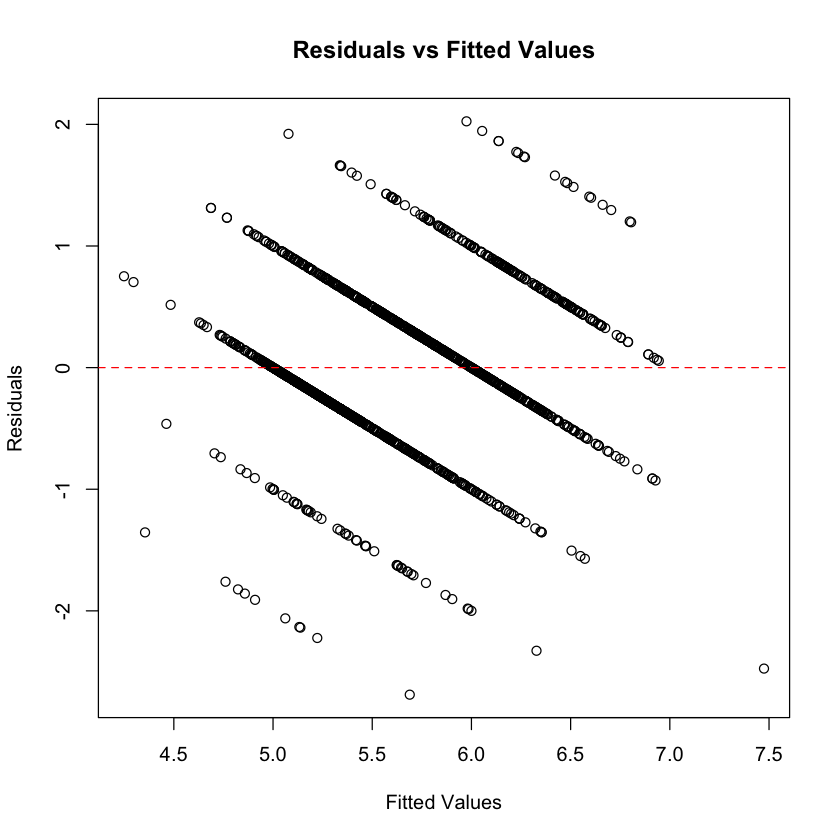


3. Homoscedasticity Tests:
Breusch-Pagan test: p = 1.587975e-13 

4. Multicollinearity Assessment:
       fixed.acidity     volatile.acidity          citric.acid 
            7.767512             1.789390             3.128022 
      residual.sugar            chlorides  free.sulfur.dioxide 
            1.702588             1.481932             1.963019 
total.sulfur.dioxide              density                   pH 
            2.186813             6.343760             3.329732 
           sulphates              alcohol 
            1.429434             3.031160 

VIF Interpretation (>10 indicates multicollinearity):
No serious multicollinearity detected (all VIF < 10)

5. Autocorrelation Test:
Durbin-Watson test: p = 4.356123e-07 


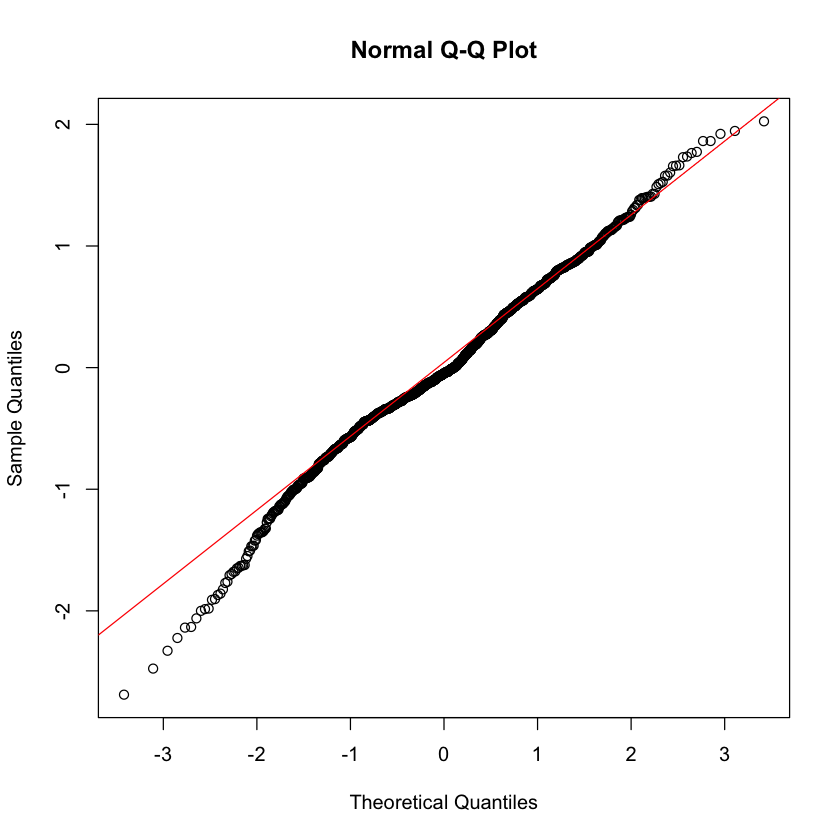

In [7]:
cat("\n--- Regression Diagnostics ---\n")

# 1. Linearity Check - Residuals vs Fitted Plot
cat("1. Linearity Assessment:\n")
plot(fitted(wine_lm), resid(wine_lm),
     main = "Residuals vs Fitted Values",
     xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, col = "red", lty = 2)

# RESET test for linearity
reset_test <- resettest(wine_lm, power = 2:3, type = "fitted")
cat("RESET Test for Linearity: p =", reset_test$p.value, "\n")

# 2. Normality of Residuals
cat("\n2. Normality of Residuals:\n")
shapiro_resid <- shapiro.test(resid(wine_lm))
cat("Shapiro-Wilk test on residuals: p =", shapiro_resid$p.value, "\n")

# Q-Q plot
qqnorm(resid(wine_lm))
qqline(resid(wine_lm), col = "red")

# 3. Homoscedasticity (Equal Variances)
cat("\n3. Homoscedasticity Tests:\n")
bp_test <- bptest(wine_lm)
cat("Breusch-Pagan test: p =", bp_test$p.value, "\n")

# 4. Multicollinearity Check
cat("\n4. Multicollinearity Assessment:\n")
vif_values <- vif(wine_lm)
print(vif_values)

cat("\nVIF Interpretation (>10 indicates multicollinearity):\n")
high_vif <- vif_values[vif_values > 10]
if(length(high_vif) > 0) {
  cat("High VIF variables:", names(high_vif), "\n")
} else {
  cat("No serious multicollinearity detected (all VIF < 10)\n")
}

# 5. Autocorrelation Check
cat("\n5. Autocorrelation Test:\n")
dw_test <- dwtest(wine_lm)
cat("Durbin-Watson test: p =", dw_test$p.value, "\n")


# =============================================================================
# TASK 4: CLASSIFICATION - GOOD VS BAD WINES
# =============================================================================



=== TASK 4: GOOD VS BAD WINE CLASSIFICATION ===
Classification Distribution:

 Bad Good 
 246  198 

--- Logistic Regression Model ---



Call:
glm(formula = predictor_formula, family = binomial, data = classification_data)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           3.609e+02  2.044e+02   1.766  0.07747 .  
fixed.acidity         3.912e-01  2.447e-01   1.598  0.10994    
volatile.acidity     -8.784e+00  1.551e+00  -5.662 1.49e-08 ***
citric.acid          -2.680e-01  1.411e+00  -0.190  0.84935    
residual.sugar        3.779e-01  9.161e-02   4.125 3.71e-05 ***
chlorides            -3.125e-01  5.477e+00  -0.057  0.95450    
free.sulfur.dioxide   2.896e-02  9.659e-03   2.998  0.00272 ** 
total.sulfur.dioxide -1.109e-02  4.660e-03  -2.379  0.01734 *  
density              -3.879e+02  2.082e+02  -1.863  0.06242 .  
pH                    2.918e+00  1.360e+00   2.145  0.03195 *  
sulphates             3.339e+00  1.309e+00   2.550  0.01077 *  
alcohol               1.101e+00  2.890e-01   3.808  0.00014 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Model Fit Statistics:
AIC: 326.1827 
Null Deviance: 610.3154 
Residual Deviance: 302.1827 

Confusion Matrix:
      Predicted
Actual Bad Good
  Bad  215   31
  Good  36  162

Classification Performance:
Accuracy: 0.8491 
Sensitivity (True Positive Rate): 0.8182 
Specificity (True Negative Rate): 0.874 

=== TASK 5: WINE TYPE PREDICTION (RED VS WHITE) ===
Training set size: 4547 
Validation set size: 1950 

--- Wine Type Prediction Model Summary ---



Call:
glm(formula = variety_formula, family = binomial, data = train_data)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.341e+03  1.796e+02  -7.467 8.22e-14 ***
fixed.acidity         2.829e-01  2.544e-01   1.112 0.266094    
volatile.acidity      7.296e+00  1.182e+00   6.172 6.74e-10 ***
citric.acid          -3.238e+00  1.365e+00  -2.371 0.017719 *  
residual.sugar       -8.842e-01  1.139e-01  -7.764 8.23e-15 ***
chlorides             2.453e+01  4.575e+00   5.360 8.32e-08 ***
free.sulfur.dioxide   6.345e-02  1.688e-02   3.758 0.000171 ***
total.sulfur.dioxide -5.552e-02  5.921e-03  -9.376  < 2e-16 ***
density               1.330e+03  1.835e+02   7.245 4.34e-13 ***
pH                    7.346e-01  1.534e+00   0.479 0.632040    
sulphates             4.849e+00  1.440e+00   3.366 0.000762 ***
alcohol               1.250e+00  2.712e-01   4.610 4.02e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersi


Validation Set Confusion Matrix:
      Predicted
Actual    0    1
     0 1464    2
     1   13  471

Validation Set Performance:
Accuracy: 0.9923 
Sensitivity: 0.9731 
Specificity: 0.9986 

--- ROC Analysis ---


Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC Value: 0.9963 

AUC Interpretation:
Outstanding classification (AUC <U+2265> 0.9)


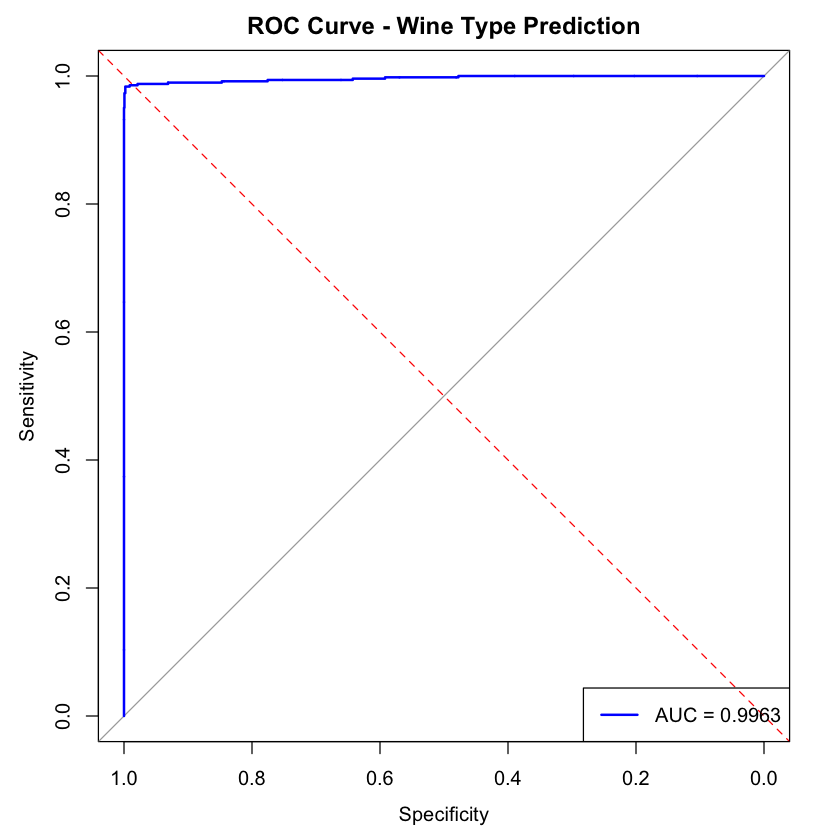

In [8]:
cat("\n=== TASK 4: GOOD VS BAD WINE CLASSIFICATION ===\n")

# Create binary classification: Good (≥8) vs Bad (≤4)
wine_data$quality_binary <- ifelse(wine_data$quality >= 8, "Good",
                                  ifelse(wine_data$quality <= 4, "Bad", "Medium"))

# Filter for only Good and Bad wines (exclude Medium)
classification_data <- wine_data[wine_data$quality_binary %in% c("Good", "Bad"), ]
classification_data$quality_binary <- factor(classification_data$quality_binary, levels = c("Bad", "Good"))

cat("Classification Distribution:\n")
print(table(classification_data$quality_binary))

# Prepare predictor variables
predictor_formula <- as.formula(paste("quality_binary ~", paste(predictor_vars, collapse = " + ")))

# Logistic Regression Model
cat("\n--- Logistic Regression Model ---\n")
quality_glm <- glm(predictor_formula, data = classification_data, family = binomial)
summary(quality_glm)

# Model fit statistics
cat("\nModel Fit Statistics:\n")
cat("AIC:", AIC(quality_glm), "\n")
cat("Null Deviance:", quality_glm$null.deviance, "\n")
cat("Residual Deviance:", quality_glm$deviance, "\n")

# Predictions and Classification Performance
predicted_probs <- predict(quality_glm, type = "response")
predicted_class <- ifelse(predicted_probs > 0.5, "Good", "Bad")

# Confusion Matrix
conf_matrix <- table(Actual = classification_data$quality_binary, Predicted = predicted_class)
cat("\nConfusion Matrix:\n")
print(conf_matrix)

# Calculate performance metrics
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
sensitivity <- conf_matrix[2,2] / sum(conf_matrix[2,])
specificity <- conf_matrix[1,1] / sum(conf_matrix[1,])

cat("\nClassification Performance:\n")
cat("Accuracy:", round(accuracy, 4), "\n")
cat("Sensitivity (True Positive Rate):", round(sensitivity, 4), "\n")
cat("Specificity (True Negative Rate):", round(specificity, 4), "\n")

# =============================================================================
# TASK 5: WINE TYPE PREDICTION (RED VS WHITE)
# =============================================================================

cat("\n=== TASK 5: WINE TYPE PREDICTION (RED VS WHITE) ===\n")

# Convert variety to binary (0/1) as required
wine_data$variety_binary <- ifelse(wine_data$variety == "red", 1, 0)

# Split data into training and validation sets (70/30 split)
set.seed(123)  # For reproducibility
train_indices <- sample(nrow(wine_data), size = 0.7 * nrow(wine_data))
train_data <- wine_data[train_indices, ]
validation_data <- wine_data[-train_indices, ]

cat("Training set size:", nrow(train_data), "\n")
cat("Validation set size:", nrow(validation_data), "\n")

# Build logistic regression model on training data
variety_formula <- as.formula(paste("variety_binary ~", paste(predictor_vars, collapse = " + ")))
variety_glm <- glm(variety_formula, data = train_data, family = binomial)

cat("\n--- Wine Type Prediction Model Summary ---\n")
summary(variety_glm)

# Predictions on validation set
validation_probs <- predict(variety_glm, newdata = validation_data, type = "response")
validation_pred <- ifelse(validation_probs > 0.5, 1, 0)

# Confusion Matrix on validation set
validation_conf <- table(Actual = validation_data$variety_binary, Predicted = validation_pred)
cat("\nValidation Set Confusion Matrix:\n")
print(validation_conf)

# Performance metrics on validation set
val_accuracy <- sum(diag(validation_conf)) / sum(validation_conf)
val_sensitivity <- validation_conf[2,2] / sum(validation_conf[2,])
val_specificity <- validation_conf[1,1] / sum(validation_conf[1,])

cat("\nValidation Set Performance:\n")
cat("Accuracy:", round(val_accuracy, 4), "\n")
cat("Sensitivity:", round(val_sensitivity, 4), "\n")
cat("Specificity:", round(val_specificity, 4), "\n")

# ROC Curve and AUC
cat("\n--- ROC Analysis ---\n")
roc_obj <- roc(validation_data$variety_binary, validation_probs)
auc_value <- auc(roc_obj)

cat("AUC Value:", round(auc_value, 4), "\n")

# Plot ROC curve
plot(roc_obj, main = "ROC Curve - Wine Type Prediction",
     col = "blue", lwd = 2)
abline(a = 0, b = 1, lty = 2, col = "red")
legend("bottomright", paste("AUC =", round(auc_value, 4)), col = "blue", lwd = 2)

# AUC Interpretation
cat("\nAUC Interpretation:\n")
if(auc_value >= 0.9) {
  cat("Outstanding classification (AUC ≥ 0.9)\n")
} else if(auc_value >= 0.8) {
  cat("Excellent classification (0.8 ≤ AUC < 0.9)\n")
} else if(auc_value >= 0.7) {
  cat("Acceptable classification (0.7 ≤ AUC < 0.8)\n")
} else {
  cat("Poor classification (AUC < 0.7)\n")
}


# =============================================================================
# TASK 6: FACTOR ANALYSIS
# =============================================================================



=== TASK 6: FACTOR ANALYSIS ===
Missing values in factor analysis data:
       fixed.acidity     volatile.acidity          citric.acid 
                   0                    0                    0 
      residual.sugar            chlorides  free.sulfur.dioxide 
                   0                    0                    0 
total.sulfur.dioxide              density                   pH 
                   0                    0                    0 
           sulphates              alcohol 
                   0                    0 

--- Correlation Matrix Suitability ---
Overall KMO value: 0.4053 
KMO assessment: Unacceptable for factor analysis

Bartlett's Test of Sphericity: p = 0 
Bartlett's test: Correlations exist (suitable for factor analysis)

Measure of Sampling Adequacy (MSA) for individual variables:
                                 Variable    MSA
fixed.acidity               fixed.acidity 0.2770
volatile.acidity         volatile.acidity 0.6130
citric.acid               

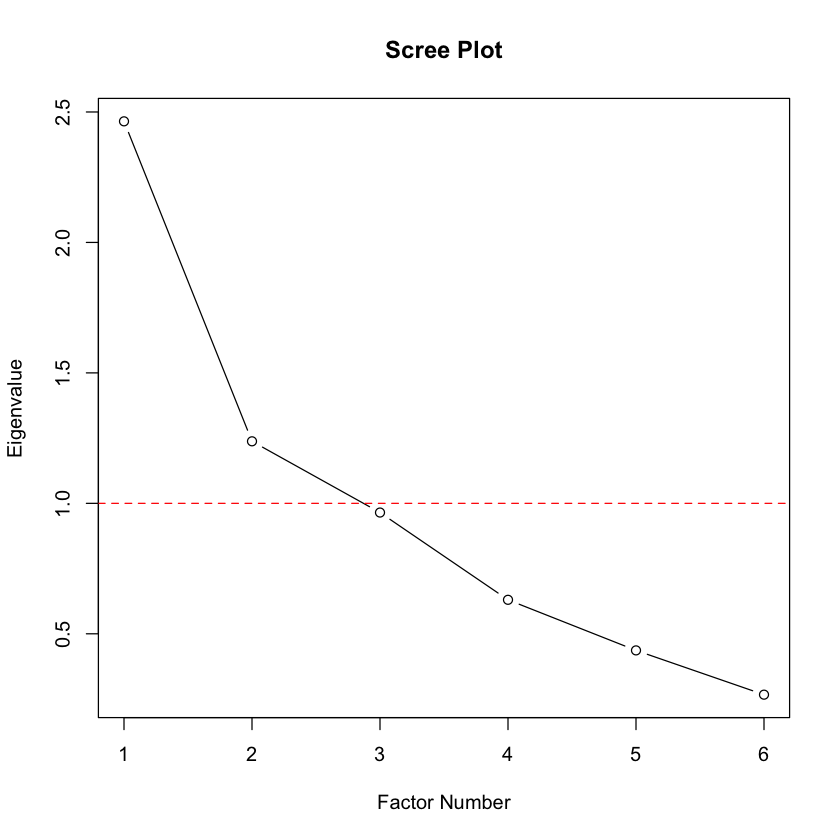

In [9]:
cat("\n=== TASK 6: FACTOR ANALYSIS ===\n")

# Prepare data for factor analysis (chemical and sensory variables only)
factor_data <- wine_data[, predictor_vars]

# Check for missing values
cat("Missing values in factor analysis data:\n")
print(sapply(factor_data, function(x) sum(is.na(x))))

# Correlation matrix assessment
cat("\n--- Correlation Matrix Suitability ---\n")
correlation_matrix <- cor(factor_data, use = "complete.obs")

# Kaiser-Meyer-Olkin (KMO) Test
kmo_result <- KMOS(factor_data)
kmo_overall <- kmo_result$KMO
msa_values <- kmo_result$MSA

cat("Overall KMO value:", round(kmo_overall, 4), "\n")
if(kmo_overall >= 0.8) {
  cat("KMO assessment: Excellent for factor analysis\n")
} else if(kmo_overall >= 0.7) {
  cat("KMO assessment: Good for factor analysis\n")
} else if(kmo_overall >= 0.6) {
  cat("KMO assessment: Adequate for factor analysis\n")
} else if(kmo_overall >= 0.5) {
  cat("KMO assessment: Poor but acceptable\n")
} else {
  cat("KMO assessment: Unacceptable for factor analysis\n")
}

# Bartlett's Test of Sphericity
bartlett_result <- cortest.bartlett(correlation_matrix, n = nrow(factor_data))
cat("\nBartlett's Test of Sphericity: p =", bartlett_result$p.value, "\n")

if(bartlett_result$p.value < 0.05) {
  cat("Bartlett's test: Correlations exist (suitable for factor analysis)\n")
} else {
  cat("Bartlett's test: No significant correlations (not suitable)\n")
}

# MSA for individual variables
cat("\nMeasure of Sampling Adequacy (MSA) for individual variables:\n")
msa_df <- data.frame(Variable = names(msa_values), MSA = round(msa_values, 4))
print(msa_df)

# Remove variables with MSA < 0.5 if any
low_msa_vars <- names(msa_values)[msa_values < 0.5]
if(length(low_msa_vars) > 0) {
  cat("\nVariables with MSA < 0.5 (consider removal):", low_msa_vars, "\n")
  # Remove low MSA variables
  factor_data_reduced <- factor_data[, !names(factor_data) %in% low_msa_vars]
} else {
  cat("\nAll variables have acceptable MSA (≥ 0.5)\n")
  factor_data_reduced <- factor_data
}

# Determine number of factors
cat("\n--- Determining Number of Factors ---\n")

# Eigenvalues
eigenvalues <- eigen(cor(factor_data_reduced))$values
cat("Eigenvalues:\n")
for(i in 1:length(eigenvalues)) {
  cat("Factor", i, ":", round(eigenvalues[i], 4), "\n")
}

# Kaiser criterion (eigenvalues > 1)
n_factors_kaiser <- sum(eigenvalues > 1)
cat("\nKaiser criterion (eigenvalues > 1):", n_factors_kaiser, "factors\n")

# Scree plot
plot(1:length(eigenvalues), eigenvalues, type = "b",
     main = "Scree Plot", xlab = "Factor Number", ylab = "Eigenvalue")
abline(h = 1, col = "red", lty = 2)

# Conduct factor analysis
cat("\n--- Factor Analysis Results ---\n")

# Try different numbers of factors
for(nf in 1:min(4, n_factors_kaiser)) {
  cat("\n=== Factor Analysis with", nf, "factor(s) ===\n")
  
  fa_result <- principal(factor_data_reduced, nfactors = nf, rotate = "varimax")
  
  # Factor loadings
  cat("Factor Loadings (>0.4 shown):\n")
  print(fa_result, cut = 0.4, sort = TRUE)
  
  # Variance explained
  variance_explained <- fa_result$values[1:nf]
  total_variance <- sum(variance_explained)
  proportion_variance <- total_variance / ncol(factor_data_reduced)
  
  cat("\nVariance Explained:\n")
  cat("Total eigenvalues for", nf, "factors:", round(total_variance, 4), "\n")
  cat("Proportion of variance explained:", round(proportion_variance, 4), "\n")
  cat("Percentage of variance explained:", round(proportion_variance * 100, 2), "%\n")
}


# =============================================================================
# SUMMARY AND EXPORT RESULTS
# =============================================================================

In [10]:
cat("\n=== ANALYSIS SUMMARY ===\n")
cat("1. EDA: Completed descriptive statistics and visualizations\n")
cat("2. T-test: Alcohol content comparison between wine types\n")
cat("3. Linear Regression: Quality prediction for red wines\n")
cat("4. Classification: Good vs Bad wine classification\n")
cat("5. Prediction: Red vs White wine type prediction with validation\n")
cat("6. Factor Analysis: Dimensionality reduction of chemical variables\n")

# Save workspace for further analysis if needed
# save.image("wine_analysis_workspace.RData")

cat("\nAnalysis completed successfully!\n")
cat("All results are documented above and ready for term paper integration.\n")

# Reset plotting parameters
par(mfrow = c(1, 1))


=== ANALYSIS SUMMARY ===
1. EDA: Completed descriptive statistics and visualizations
2. T-test: Alcohol content comparison between wine types
3. Linear Regression: Quality prediction for red wines
4. Classification: Good vs Bad wine classification
5. Prediction: Red vs White wine type prediction with validation
6. Factor Analysis: Dimensionality reduction of chemical variables

Analysis completed successfully!
All results are documented above and ready for term paper integration.
